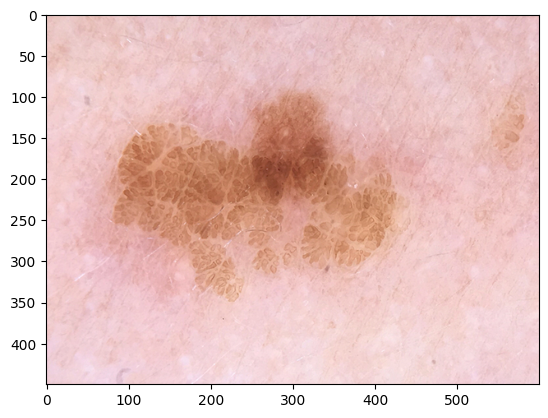

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
%matplotlib inline
 
# Read in the image
image = cv2.imread(r"D:\WorkSpace_Thinh1\GUI_DataMining\GUI_DataMining\server1\data_test\ISIC2018_Task3_Test_Images\ISIC_0034542.jpg")
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

In [2]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

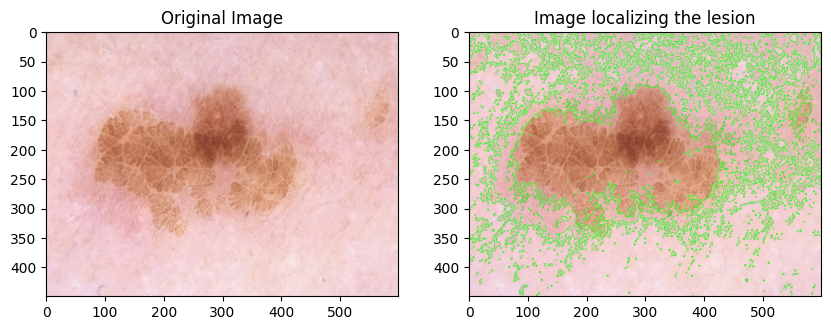

In [3]:
# Define criteria for the algorithm to stop
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Perform k-means clustering
k = 4  # Number of clusters
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert labels to the original image shape
labels = labels.reshape((image.shape[:2]))


mask = (labels == 0).astype(np.uint8) * 255
# Detect edges between the clusters
edges = cv2.Canny(mask, 100, 200)
    
# Draw the edges on the original image
image_with_edges = image.copy()
image_with_edges[edges == 255] = [0, 255, 0]


# Plot the original image and the image with boundaries
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_with_edges)
plt.title('Image localizing the lesion')

plt.show()

In [4]:
import base64
import cv2
import numpy as np

def segment_image(image_data):
    # Convert image to RGB
    image = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)

    # Reshape the image into a 2D array of pixels and 3 color values (RGB)
    pixel_vals = image.reshape((-1, 3))

    # Convert to float type
    pixel_vals = np.float32(pixel_vals)

    # Define criteria for the algorithm to stop
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

    # Perform k-means clustering
    k = 4  # Number of clusters
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert labels to the original image shape
    labels = labels.reshape((image.shape[:2]))

    mask = (labels == 0).astype(np.uint8) * 255

    # Detect edges between the clusters
    edges = cv2.Canny(mask, 100, 200)

    # Draw the edges on the original image
    image_with_edges = image.copy()
    image_with_edges[edges == 255] = [0, 255, 0]

    # Convert image back to BGR for opencv
    image_with_edges_bgr = cv2.cvtColor(image_with_edges, cv2.COLOR_RGB2BGR)

    # Convert image to base64 format
    retval, buffer = cv2.imencode('.jpg', image_with_edges_bgr)
    image_data = base64.b64encode(buffer).decode('utf-8')

    return image_data

image_path = r"D:\WorkSpace_Thinh1\GUI_DataMining\GUI_DataMining\server1\data_test\ISIC2018_Task3_Test_Images\ISIC_0034541.jpg"
image_data = cv2.imread(image_path)
res = segment_image(image_data)
print(res)


/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAHCAlgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD2yCea5tZR8shbAWNgMDnPt2/lV7TLpmdVFuF2KNwx19MdwOO9Z9zElrBG8b70kQEtkjJwc8fTH5H1qW3lt4EWJZ+rggDqPfA7V+J5ROtTzCFatUajGKg5TnGXO25Tjq1o3zOVo1JpR5Evdd39lwdWrYTPaOMxeIlClCnGhKpV

In [5]:
import cv2
import numpy as np
import base64

# Hàm để hiển thị ảnh từ dữ liệu base64
def display_image(base64_image):
    # Giải mã dữ liệu base64
    image_data = base64.b64decode(base64_image)
    # Chuyển dữ liệu thành mảng numpy
    nparr = np.frombuffer(image_data, np.uint8)
    # Đọc dữ liệu ảnh bằng OpenCV
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    # Hiển thị ảnh
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Sử dụng hàm để hiển thị ảnh
display_image(res)


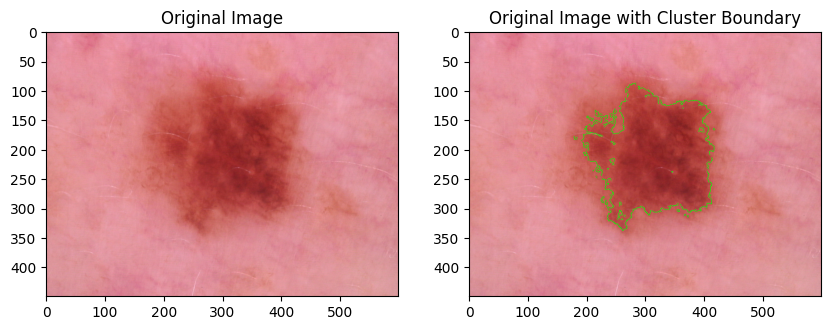

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_and_draw_clusters(image_path, k=3, max_iter=100, epsilon=0.85):
    # Đọc ảnh và chuyển sang không gian màu RGB
    image_rgb = read_rgb_image(image_path)

    # Phân đoạn ảnh và vẽ đường phân cụm
    image_with_boundary = segment_and_draw_boundary(image_rgb, k, max_iter, epsilon)

    # Hiển thị ảnh gốc và ảnh đã vẽ đường phân cụm
    show_images(image_rgb, image_with_boundary)

def read_rgb_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def segment_and_draw_boundary(image_rgb, k=3, max_iter=100, epsilon=0.85):
    # Phân đoạn ảnh
    segmented_image = segment_image_rgb(image_rgb, k, max_iter, epsilon)

    # Tạo bản sao của ảnh gốc để vẽ đường phân cụm
    image_with_boundary = image_rgb.copy()

    # Tìm ranh giới giữa hai cụm và vẽ lên bản sao của ảnh gốc
    draw_cluster_boundary(segmented_image, image_with_boundary)

    return image_with_boundary

def segment_image_rgb(image_rgb, k=3, max_iter=100, epsilon=0.85):
    # Chuyển ảnh thành mảng 1D các điểm ảnh
    pixel_vals = image_rgb.reshape((-1, 3))
    pixel_vals = np.float32(pixel_vals)

    # Định nghĩa tiêu chí dừng cho thuật toán
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

    # Thực hiện phân cụm k-means
    _, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Reshape nhãn về kích thước ban đầu của ảnh
    labels = labels.reshape(image_rgb.shape[:2])

    # Tạo mask cho mỗi phân cụm
    masks = [(labels == i).astype(np.uint8) * 255 for i in range(k)]

    # Tạo ảnh đã phân cụm
    segmented_image = np.zeros_like(image_rgb)
    for i, mask in enumerate(masks):
        segmented_image[mask > 0] = centers[i]

    return segmented_image

def draw_cluster_boundary(segmented_image, image_with_boundary):
    # Chuyển đổi ảnh phân cụm sang ảnh xám
    gray_segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)

    # Tìm ranh giới giữa các phân cụm
    edges = cv2.Canny(gray_segmented_image, 100, 200)

    # Vẽ đường phân cụm lên ảnh gốc
    image_with_boundary[edges > 0] = [0, 255, 0]  # Màu xanh đỏ

def show_images(image_rgb, image_with_boundary):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(image_with_boundary)
    plt.title('Original Image with Cluster Boundary')

    plt.show()

# Ví dụ sử dụng:
image_path = r"D:\WorkSpace_Thinh1\GUI_DataMining\GUI_DataMining\server1\data_test\data_test\ISIC_0029116.jpg"
segment_and_draw_clusters(image_path)

In [7]:
import cv2
import numpy as np
import base64
from io import BytesIO
from PIL import Image

def segment_and_draw_clusters_base64(image_path, k=3, max_iter=100, epsilon=0.85):
    # Đọc ảnh và chuyển sang không gian màu RGB
    image_rgb = read_rgb_image(image_path)

    # Phân đoạn ảnh và vẽ đường phân cụm
    image_with_boundary = segment_and_draw_boundary(image_rgb, k, max_iter, epsilon)

    # Chuyển đổi ảnh thành base64
    buffered = BytesIO()
    image_pil = Image.fromarray(image_with_boundary)
    image_pil.save(buffered, format="JPEG")
    image_base64 = base64.b64encode(buffered.getvalue()).decode('utf-8')

    return image_base64

def read_rgb_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def segment_and_draw_boundary(image_rgb, k=3, max_iter=100, epsilon=0.85):
    # Phân đoạn ảnh
    segmented_image = segment_image_rgb(image_rgb, k, max_iter, epsilon)

    # Tạo bản sao của ảnh gốc để vẽ đường phân cụm
    image_with_boundary = image_rgb.copy()

    # Tìm ranh giới giữa hai cụm và vẽ lên bản sao của ảnh gốc
    draw_cluster_boundary(segmented_image, image_with_boundary)

    return image_with_boundary

def segment_image_rgb(image_rgb, k=3, max_iter=100, epsilon=0.85):
    # Chuyển ảnh thành mảng 1D các điểm ảnh
    pixel_vals = image_rgb.reshape((-1, 3))
    pixel_vals = np.float32(pixel_vals)

    # Định nghĩa tiêu chí dừng cho thuật toán
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

    # Thực hiện phân cụm k-means
    _, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Reshape nhãn về kích thước ban đầu của ảnh
    labels = labels.reshape(image_rgb.shape[:2])

    # Tạo mask cho mỗi phân cụm
    masks = [(labels == i).astype(np.uint8) * 255 for i in range(k)]

    # Tạo ảnh đã phân cụm
    segmented_image = np.zeros_like(image_rgb)
    for i, mask in enumerate(masks):
        segmented_image[mask > 0] = centers[i]

    return segmented_image

def draw_cluster_boundary(segmented_image, image_with_boundary):
    # Chuyển đổi ảnh phân cụm sang ảnh xám
    gray_segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)

    # Tìm ranh giới giữa các phân cụm
    edges = cv2.Canny(gray_segmented_image, 100, 200)

    # Vẽ đường phân cụm lên ảnh gốc
    image_with_boundary[edges > 0] = [0, 255, 0]  # Màu xanh đỏ


In [8]:
image_path = r"D:\WorkSpace_Thinh1\GUI_DataMining\GUI_DataMining\server1\data_test\data_test\ISIC_0029116.jpg"
res = segment_and_draw_clusters_base64(image_path)

In [9]:
import cv2
import numpy as np
import base64

# Hàm để hiển thị ảnh từ dữ liệu base64
def display_image(base64_image):
    # Giải mã dữ liệu base64
    image_data = base64.b64decode(base64_image)
    # Chuyển dữ liệu thành mảng numpy
    nparr = np.frombuffer(image_data, np.uint8)
    # Đọc dữ liệu ảnh bằng OpenCV
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    # Hiển thị ảnh
    cv2.imshow('Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Sử dụng hàm để hiển thị ảnh
display_image(res)